In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2



In [5]:
# This statistic shows the total number of air-source heat pumps shipped in the United States from 2001 to 2021. 
# According to the source, 3.92 million air-source heat pumps were shipped in the United States in 2021.

# Data from: Statista (Sourced from Canary Media and EIA.)


In [6]:
df = pd.read_excel("statistic_id220358_us-air-source-heat-pump-shipments-2001-2021.xlsx", 'Data')

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.drop([0, 1, 2, 3], axis=0, inplace=True)

In [11]:
df.columns = ['year', 'shipments_in_mill']

In [12]:
df.to_csv('heat-pump-national-shipment.csv', index=False)

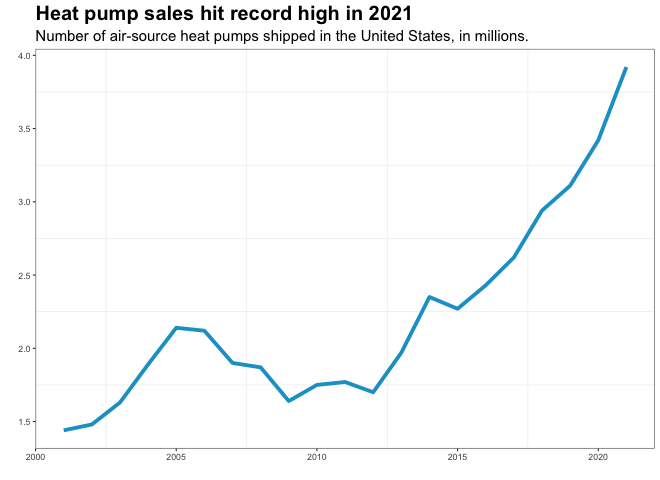

In [39]:
%%R -w 660

df <- read.csv(file = 'heat-pump-national-shipment.csv')

ggplot(df) +
    aes(x=year, y=shipments_in_mill) +
    geom_line(color="#18a1cd", size=1.8) +
    labs(
        title="Heat pump sales hit record high in 2021",
        subtitle="Number of air-source heat pumps shipped in the United States, in millions.",
        x="",
        y="") +
    theme_bw() +
    theme(
        plot.title = element_text(size = 20, face = "bold"),
        plot.subtitle = element_text(size = 15),
        panel.grid.major.x = element_blank(),
        panel.grid.major.y = element_blank())
    